In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

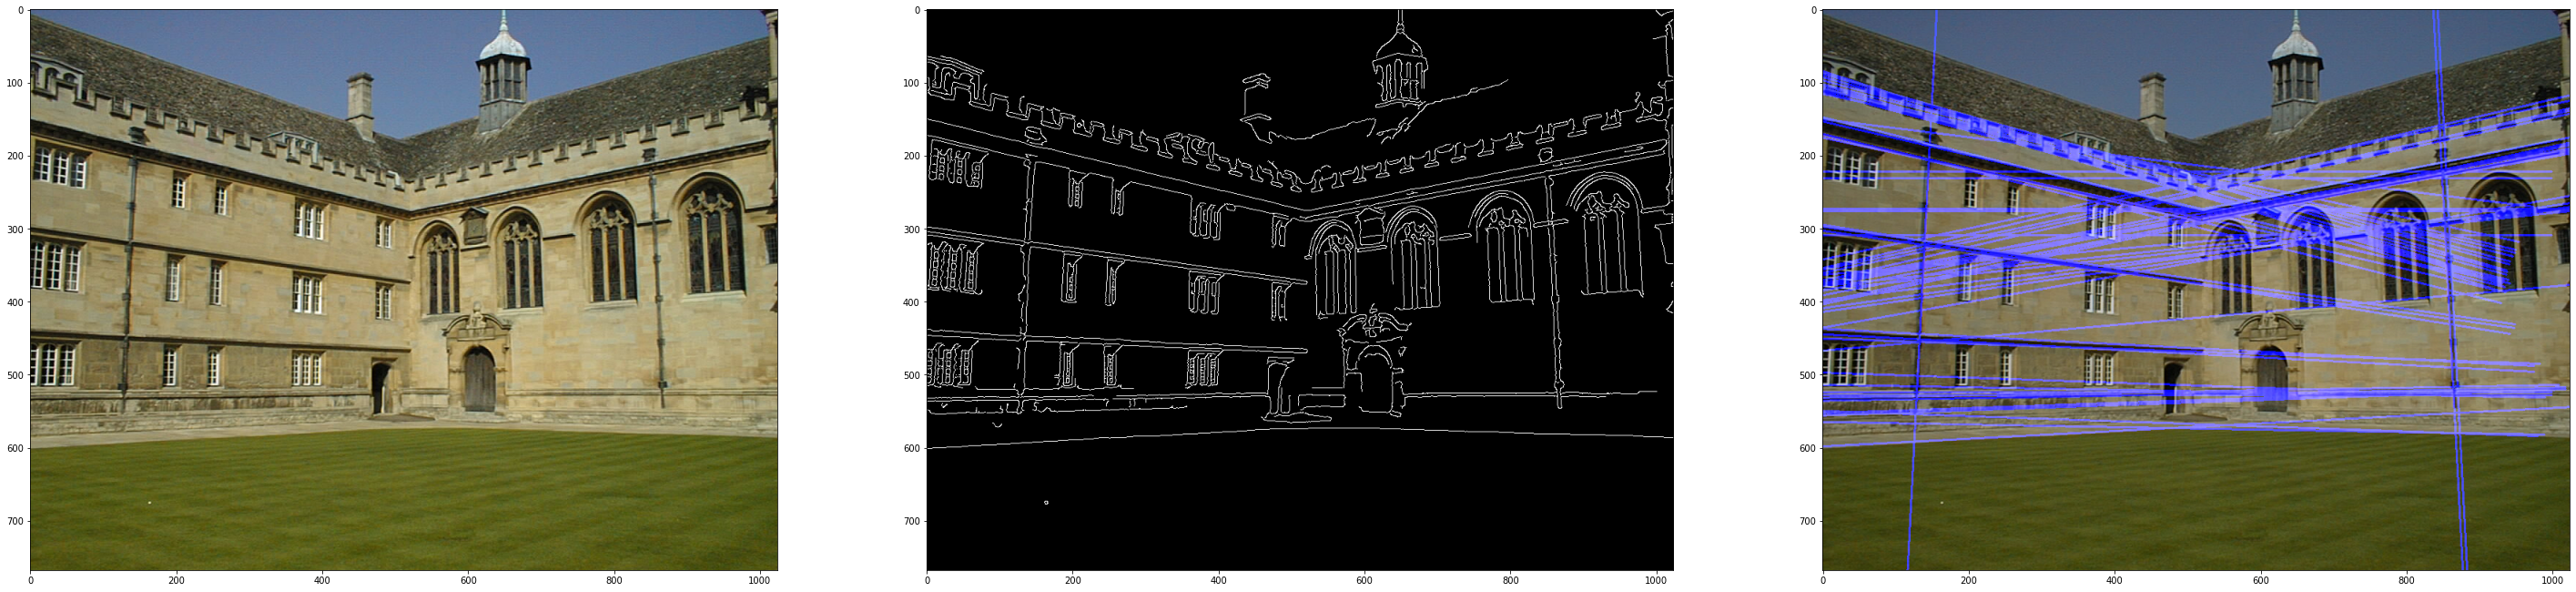

In [6]:

import matplotlib.image as mpimg

image1 = mpimg.imread("ukflag.png") 
image = mpimg.imread("001.jpg")


gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
blurred_image = cv.GaussianBlur(gray_image, (9, 9), 0)
edges_image = cv.Canny(blurred_image, 50, 120)
   
rho_resolution = 1.5
theta_resolution = np.pi/180
threshold = 190

 
def draw_lines(img, houghLines, color=[0, 0, 255], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv.line(img,(x1,y1),(x2,y2),color,thickness)   
                
 
def weighted_img(img, initial_img, α=0.8, β=1.1, λ=0.):
    return cv.addWeighted(initial_img, α, img, β, λ)

hough_lines = cv.HoughLines(edges_image, rho_resolution , theta_resolution , threshold,10,50)
 
hough_lines_image = np.zeros_like(image)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image,image)

plt.figure(figsize = (50,40))
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(edges_image, cmap='gray')
plt.subplot(133)
plt.imshow(original_image_with_hough_lines, cmap='gray') 
plt.show()

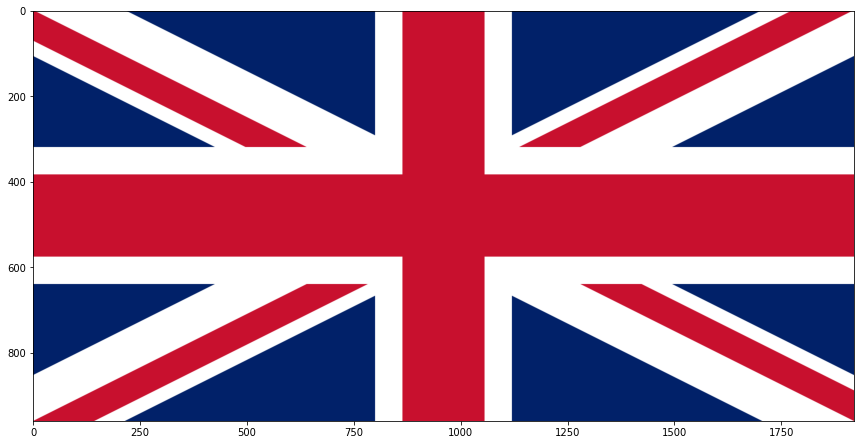

In [68]:
image1 = mpimg.imread("ukflag.png")
plt.figure(figsize = (50,40))
plt.subplot(131)
plt.imshow(image1)
plt.show()

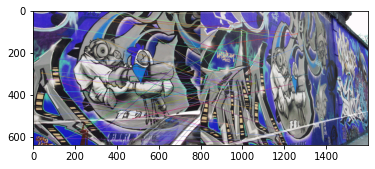

In [21]:
#Question 3
#part a

 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv.imread('img1.ppm')  
img2 = cv.imread('img5.ppm') 

img1 = cv.cvtColor(img1, cv.IMREAD_COLOR)#COLOR_BGR2GRAY
img2 = cv.cvtColor(img2, cv.IMREAD_COLOR)

#sift
sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3)
plt.show()

[[ 6.6378505e-01  6.8003334e-01 -3.1230335e+01]
 [-1.4495500e-01  9.7128304e-01  1.4877420e+02]
 [ 4.2518504e-04 -1.3930359e-05  1.0000000e+00]]


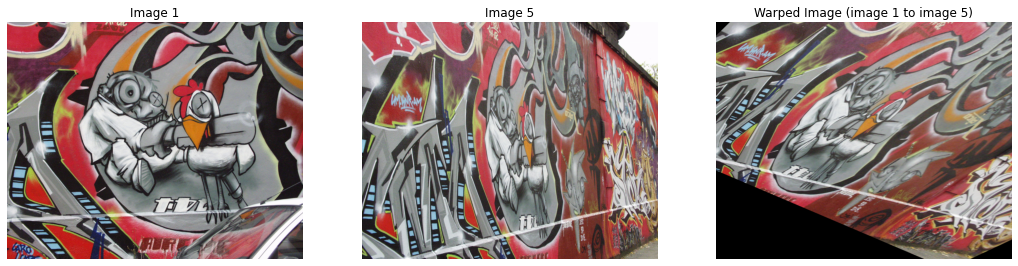

In [10]:
import cv2 as cv
import numpy as np
im1=cv.imread("img1.ppm",cv.IMREAD_ANYCOLOR)
im5=cv.imread("img5.ppm",cv.IMREAD_ANYCOLOR)
H = []
with open(r'H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])
im1to5 = cv.warpPerspective(im5, np.linalg.inv(H), (2000, 2000))
print(H)
fog, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title("Image 1")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(im5, cv.COLOR_BGR2RGB))
ax[1].set_title("Image 5")
ax[1].axis("off")
ax[2].imshow(cv.cvtColor(im1to5[:800, :1000], cv.COLOR_BGR2RGB))
ax[2].set_title("Warped Image (image 1 to image 5)")
ax[2].axis("off")
plt.show()